#converting chronic absentee data from txt files to csv
#Chronic Absentee data: https://www.cde.ca.gov/ds/ad/filesabd.asp
#Chronic Absentee file description: https://www.cde.ca.gov/ds/ad/fsabd.asp
#from 2022 on, DASS column was added so remove for consistency 

df1 = pd.read_csv("chronicabsenteeism23.txt", delimiter= '\t', low_memory=False, on_bad_lines='skip', encoding = 'unicode_escape')
df1 = df1.drop("DASS", axis='columns')
#Only want school based data
df1 = df1[df1['Aggregate Level'] == "S"]
#drop unused columns to make data scrollable
df1 = df1.drop(['Aggregate Level', 'County Code', 'District Code', 'School Code', 'County Name', 'Charter School'], axis = 1)
#remove student privacy null data
df1 = df1[df1['ChronicAbsenteeismCount'] != '*']
df1.to_csv('chronicabsenteeism23.csv', index = None)

df2 = pd.read_csv("chronicabsenteeism22-v3.txt", delimiter= '\t', low_memory=False, on_bad_lines='skip', encoding = 'unicode_escape')
df2 = df2.drop("DASS", axis='columns')
df2 = df2[df2['Aggregate Level'] == "S"]
df2 = df2.drop(['Aggregate Level', 'County Code', 'District Code', 'School Code', 'County Name', 'Charter School'], axis = 1)
df1 = df1[df1['ChronicAbsenteeismCount'] != '*']
df2.to_csv('chronicabsenteeism22.csv', index = None)

df3 = pd.read_csv("chronicabsenteeism21.txt", delimiter= '\t', low_memory=False, on_bad_lines='skip', encoding = 'unicode_escape')
df3 = df3[df3['Aggregate Level'] == "S"]
df3 = df3.drop(['Aggregate Level', 'County Code', 'District Code', 'School Code', 'County Name', 'Charter School'], axis = 1)
df3 = df3.rename(columns={"ChronicAbsenteeismEligibleCumula":"ChronicAbsenteeismEligibleCumulativeEnrollment"})
df3 = df3[df3['ChronicAbsenteeismRate'].notnull()]
df3.to_csv('chronicabsenteeism21.csv', index = None)

df4 = pd.read_csv("chronicabsenteeism19.txt", delimiter= '\t', low_memory=False, on_bad_lines='skip', encoding = 'unicode_escape')
df4 = df4[df4['AggregateLevel'] == "S"]
df4 = df4.drop(['AggregateLevel', 'CountyCode', 'DistrictCode', 'SchoolCode', 'CountyName', 'CharterYN'], axis = 1)
df4 = df4.rename(columns={"AcademicYear":"Academic Year", "DistrictName":"District Name", "SchoolName":"School Name", "ReportingCategory":"Reporting Category", "ChronicAbsenteeismEligibleCumula":"ChronicAbsenteeismEligibleCumulativeEnrollment"})
df4 = df4[df4['ChronicAbsenteeismRate'].notnull()]
df4.to_csv('chronicabsenteeism19.csv', index = None)

df5 = pd.read_csv("chronicabsenteeism18.txt", delimiter= '\t', low_memory=False, on_bad_lines='skip', encoding = 'unicode_escape')
df5 = df5[df5['AggregateLevel'] == "S"]
df5 = df5.drop(['AggregateLevel', 'CountyCode', 'DistrictCode', 'SchoolCode', 'CountyName', 'CharterYN'], axis = 1)
df5 = df5.rename(columns={"AcademicYear":"Academic Year", "DistrictName":"District Name", "SchoolName":"School Name", "ReportingCategory":"Reporting Category", "ChronicAbsenteeismEligibleCumula":"ChronicAbsenteeismEligibleCumulativeEnrollment"})
df5 = df5[df5['ChronicAbsenteeismRate'].notnull()]
df5.to_csv('chronicabsenteeism18.csv', index = None)

df6 = pd.read_csv("chronicabsenteeism17.txt", delimiter= '\t', low_memory=False, on_bad_lines='skip', encoding = 'unicode_escape')
df6 = df6[df6['AggregateLevel'] == "S"]
df6 = df6.drop(['AggregateLevel', 'CountyCode', 'DistrictCode', 'SchoolCode', 'CountyName', 'CharterYN'], axis = 1)
df6 = df6.rename(columns={"AcademicYear":"Academic Year", "DistrictName":"District Name", "SchoolName":"School Name", "ReportingCategory":"Reporting Category", "ChronicAbsenteeismEligibleCumula":"ChronicAbsenteeismEligibleCumulativeEnrollment"})
df6 = df6[df6['ChronicAbsenteeismRate'].notnull()]
df6.to_csv('chronicabsenteeism17.csv', index = None)

#Concatenate all Chronic Absentee data
dfAbsentee = pd.concat([df1,df2,df3,df4,df5,df6], ignore_index = True, sort = False)
dfAbsentee.to_csv('allChronicAbsentee.csv', index = None)

In [13]:
#All Absentee Data
#pull chronic absenteeism for 2021 by demographics
import pandas as pd

#allChronicAbsentee is already cleaned

dfAbsRAW = pd.read_csv("allChronicAbsentee.csv")
#trying to fix column dtype error ^ : , dtype={['4']: str, 'School Name': str}
dfAbsRAW = dfAbsRAW.drop(['District Name', 'ChronicAbsenteeismRate'], axis = 1)
dfAbsRAW = dfAbsRAW.sort_values(by=['Academic Year', 'School Name']).dropna()
dfAbsRAW


C:\Users\matth\AppData\Local\Temp\ipykernel_3264\2855257334.py:7: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dfAbsRAW = pd.read_csv("allChronicAbsentee.csv")


,Academic Year,School Name,Reporting Category,ChronicAbsenteeismEligibleCumulativeEnrollment,ChronicAbsenteeismCount
831552,2016-17,21st Century Learning Institute,GF,70.0,30.0
831564,2016-17,21st Century Learning Institute,GM,63.0,28.0
831583,2016-17,21st Century Learning Institute,GR46,9.0,1.0
831589,2016-17,21st Century Learning Institute,GR78,16.0,4.0
831591,2016-17,21st Century Learning Institute,GR912,104.0,53.0
...,...,...,...,...,...
106147,2022-23,one.Charter,SE,141,36
106148,2022-23,one.Charter,SF,25,9
106149,2022-23,one.Charter,SH,80,29
106150,2022-23,one.Charter,SS,1287,361


In [2]:
demographicList = [
"RB",
"RI",
"RA",
"RF",
"RH",
"RD",
"RP",
"RT",
"RW",
"GM",
"GF",
"GX",
"SE",
"SD",
"SS",
"SM",
"SF",
"SH",
"GRKN",
"GR13",
"GR46",
"GR78",
"GRK8",
"GR912",
"TA"]

In 2016-17 with 583438.0 absent of a possible 2040544.0 students, the chronic absentee rate of RB is:  0.2859227735349005
In 2016-17 with 27382.0 absent of a possible 87837.0 students, the chronic absentee rate of RI is:  0.3117365119482678
In 2016-17 with 214082.0 absent of a possible 3444010.0 students, the chronic absentee rate of RA is:  0.06216067897596116
In 2016-17 with 61236.0 absent of a possible 785221.0 students, the chronic absentee rate of RF is:  0.07798568810564159
In 2016-17 with 4327254.0 absent of a possible 21189737.0 students, the chronic absentee rate of RH is:  0.20421461578310293
In 2016-17 with 50761.0 absent of a possible 270661.0 students, the chronic absentee rate of RD is:  0.18754456681974868
In 2016-17 with 21515.0 absent of a possible 78743.0 students, the chronic absentee rate of RP is:  0.2732306363740269
In 2016-17 with 212973.0 absent of a possible 1408372.0 students, the chronic absentee rate of RT is:  0.15121928013337385
In 2016-17 with 1171399.0 a

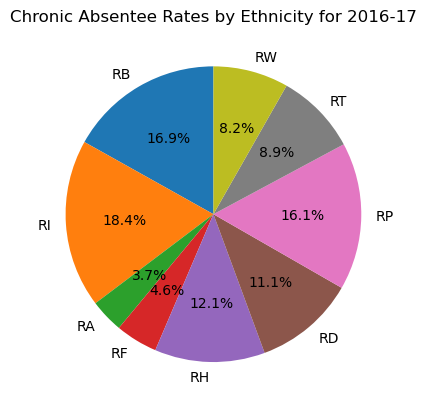

In 2017-18 with 583438.0 absent of a possible 2040544.0 students, the chronic absentee rate of RB is:  0.2859227735349005
In 2017-18 with 27382.0 absent of a possible 87837.0 students, the chronic absentee rate of RI is:  0.3117365119482678
In 2017-18 with 214082.0 absent of a possible 3444010.0 students, the chronic absentee rate of RA is:  0.06216067897596116
In 2017-18 with 61236.0 absent of a possible 785221.0 students, the chronic absentee rate of RF is:  0.07798568810564159
In 2017-18 with 4327254.0 absent of a possible 21189737.0 students, the chronic absentee rate of RH is:  0.20421461578310293
In 2017-18 with 50761.0 absent of a possible 270661.0 students, the chronic absentee rate of RD is:  0.18754456681974868
In 2017-18 with 21515.0 absent of a possible 78743.0 students, the chronic absentee rate of RP is:  0.2732306363740269
In 2017-18 with 212973.0 absent of a possible 1408372.0 students, the chronic absentee rate of RT is:  0.15121928013337385
In 2017-18 with 1171399.0 a

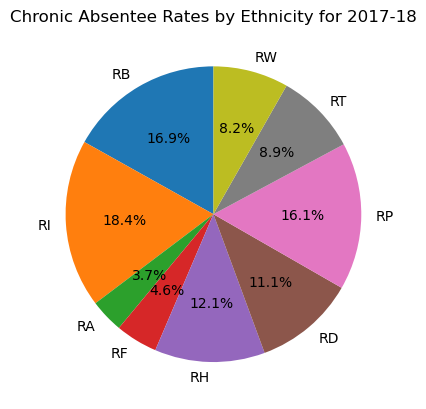

In 2018-19 with 583438.0 absent of a possible 2040544.0 students, the chronic absentee rate of RB is:  0.2859227735349005
In 2018-19 with 27382.0 absent of a possible 87837.0 students, the chronic absentee rate of RI is:  0.3117365119482678
In 2018-19 with 214082.0 absent of a possible 3444010.0 students, the chronic absentee rate of RA is:  0.06216067897596116
In 2018-19 with 61236.0 absent of a possible 785221.0 students, the chronic absentee rate of RF is:  0.07798568810564159
In 2018-19 with 4327254.0 absent of a possible 21189737.0 students, the chronic absentee rate of RH is:  0.20421461578310293
In 2018-19 with 50761.0 absent of a possible 270661.0 students, the chronic absentee rate of RD is:  0.18754456681974868
In 2018-19 with 21515.0 absent of a possible 78743.0 students, the chronic absentee rate of RP is:  0.2732306363740269
In 2018-19 with 212973.0 absent of a possible 1408372.0 students, the chronic absentee rate of RT is:  0.15121928013337385
In 2018-19 with 1171399.0 a

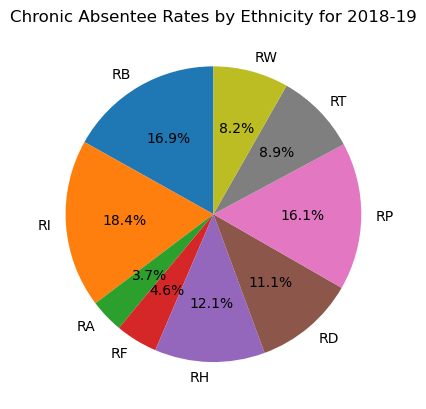

In 2020-21 with 583438.0 absent of a possible 2040544.0 students, the chronic absentee rate of RB is:  0.2859227735349005
In 2020-21 with 27382.0 absent of a possible 87837.0 students, the chronic absentee rate of RI is:  0.3117365119482678
In 2020-21 with 214082.0 absent of a possible 3444010.0 students, the chronic absentee rate of RA is:  0.06216067897596116
In 2020-21 with 61236.0 absent of a possible 785221.0 students, the chronic absentee rate of RF is:  0.07798568810564159
In 2020-21 with 4327254.0 absent of a possible 21189737.0 students, the chronic absentee rate of RH is:  0.20421461578310293
In 2020-21 with 50761.0 absent of a possible 270661.0 students, the chronic absentee rate of RD is:  0.18754456681974868
In 2020-21 with 21515.0 absent of a possible 78743.0 students, the chronic absentee rate of RP is:  0.2732306363740269
In 2020-21 with 212973.0 absent of a possible 1408372.0 students, the chronic absentee rate of RT is:  0.15121928013337385
In 2020-21 with 1171399.0 a

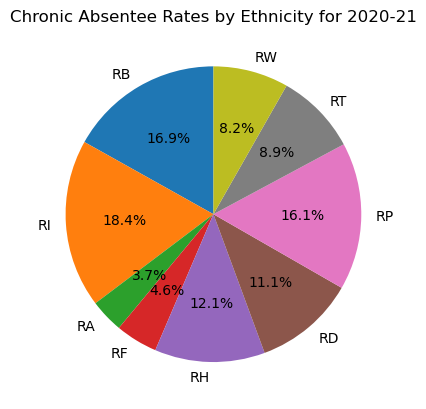

In [ ]:
#going through all years in main chronic absentee data
import matplotlib.pyplot as plt

for year in dfAbsRAW['Academic Year'].unique().tolist():
    absRateDemoList = []
    for demo in demographicList:
        dfAbsDemo = dfAbsRAW[dfAbsRAW['Reporting Category'] == demo].dropna()
        dfAbsDemo = dfAbsDemo.dropna()
        dfAbsDemo = dfAbsDemo[dfAbsDemo['ChronicAbsenteeismEligibleCumulativeEnrollment'] != "*"]
        eligibleDemo = dfAbsDemo['ChronicAbsenteeismEligibleCumulativeEnrollment'].astype(float).sum()
        chronicAbsDemo = dfAbsDemo['ChronicAbsenteeismCount'].astype(float).sum()
        absRateDemo = chronicAbsDemo/eligibleDemo
    
        absRateDemoList.append(absRateDemo)
        
        print("In", year, "with", chronicAbsDemo, "absent of a possible", eligibleDemo, "students, the chronic absentee rate of", demo, "is: ", absRateDemo)
    
    #print pie chart for that year
    plt.pie(absRateDemoList[0:9], labels = demographicList[0:9], autopct='%1.1f%%', startangle=90)
    title = "Chronic Absentee Rates by Ethnicity for " + str(year)
    plt.title(title) 
    plt.show()
